### Settings for UCS30  
High Voltage:  950 V  
Coarse Gain:  8  
Fine Gain:  1.7  

This placed the 662-keV peak of Cs-137 around channel 660  

### Calibration  
Used sources from the Gamma Source Set (Model RSS 8)  

Collected data for Cs-137 for 600 s  

32-keV peak:  channel 34  
662-keV peak:  channel 654  

Collected data for Na-22 for 600 s  

511-keV peak:  channel 506  

Used 3-point energy calibration

### Compton Scattering  
Used the 37-MBq Cs-137 source

0 deg  600 s  657.91 keV (no target)
30 deg  3600 s  (backgrd w/o target for 1147 s)  557 keV  
60 deg  36000 s (backgrd w/o target for 3600 s)  399 keV

Data with background subtracted for 60 deg is shown below

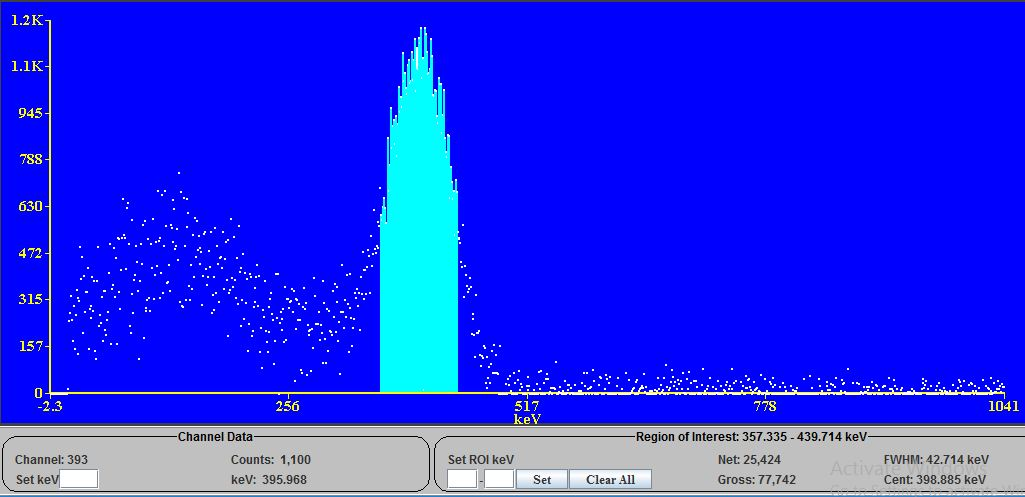

In [1]:
from IPython.display import Image
Image(filename='Compton-60deg.jpg',width=500)

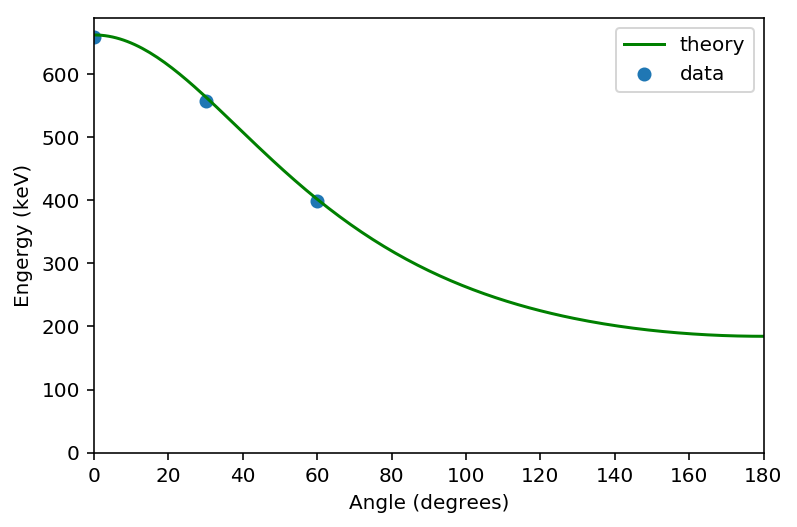

In [1]:
from numpy import *
from pylab import *

mc2 = 511.
E0 = 662. #658.

th_data = array([0,30,60])
E_data = array([658, 557, 399])

theta = arange(0,181,1)
E = E0/(1.0+(E0/mc2)*(1.0-cos(radians(theta))))
figure()
plot(theta,E,c='g',label='theory')
scatter(th_data,E_data,label='data')
xlabel('Angle (degrees)')
ylabel('Engergy (keV)')
xlim(0,180)
ylim(0)
legend()

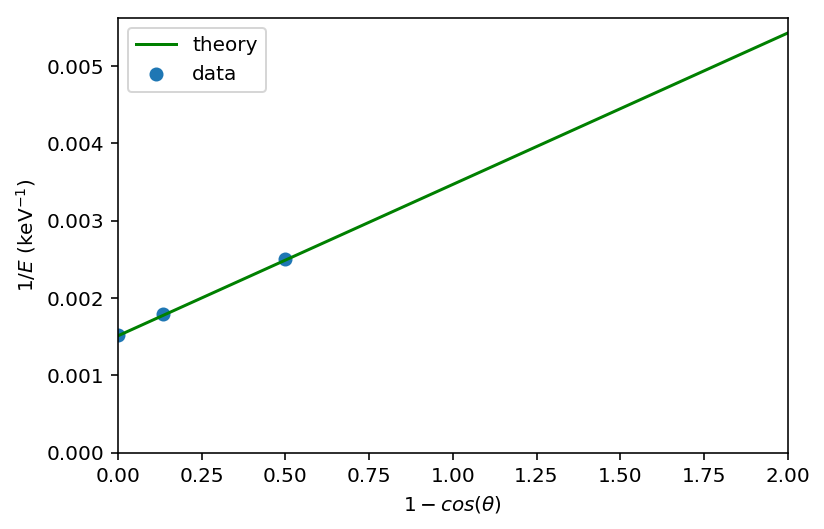

In [2]:
x=(1.0-cos(radians(th_data)))
y=1.0/E_data
plot((1.0-cos(radians(theta))),1/E,c='g',label='theory')
scatter(x,y,label='data')
xlabel(r'$1-cos(\theta)$')
ylabel(r'$1/E\ \rm{(keV^{-1})}$')
xlim(0,2)
ylim(0)
legend()

(array([  0.        ,   1.38461538,   2.76923077,   4.15384615,
         5.53846154,   6.92307692,   8.30769231,   9.69230769,
        11.07692308,  12.46153846,  13.84615385,  15.23076923,
        16.61538462,  18.        ,  19.38461538,  20.76923077,
        22.15384615,  23.53846154,  24.92307692,  26.30769231,
        27.69230769,  29.07692308,  30.46153846,  31.84615385,
        33.23076923,  34.61538462,  36.        ,  37.38461538,
        38.76923077,  40.15384615,  41.53846154,  42.92307692,
        44.30769231,  45.69230769,  47.07692308,  48.46153846,
        49.84615385,  51.23076923,  52.61538462,  54.        ,
        55.38461538,  56.76923077,  58.15384615,  59.53846154,
        60.92307692,  62.30769231,  63.69230769,  65.07692308,
        66.46153846,  67.84615385,  69.23076923,  70.61538462,
        72.        ,  73.38461538,  74.76923077,  76.15384615,
        77.53846154,  78.92307692,  80.30769231,  81.69230769,
        83.07692308,  84.46153846,  85.84615385,  87.2

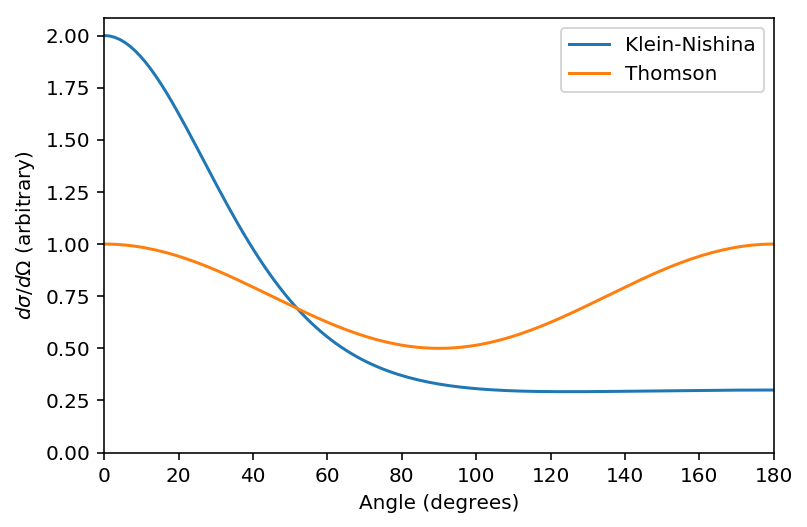

In [3]:
from pylab import *

a = 662./511.
thetadeg = linspace(0,180,131)
theta = thetadeg*pi/180
dsdth = (1/(1+a*(1-cos(theta)))**2)*(1+(cos(theta))**2
                                   + (a*(1-cos(theta)))**2/(1+a*(1-cos(theta))))
#dsdth *= 0.5 # rescale peak to 1
#print(thetadeg,dsdth)
dsdth_Thomson = (1+cos(theta)**2)/2

print(thetadeg,dsdth)

figure()
plot(thetadeg,dsdth,label="Klein-Nishina")
plot(thetadeg,dsdth_Thomson,label='Thomson')
xlim(0,180)
ylim(0)
xlabel('Angle (degrees)')
ylabel(r'$d\sigma/d\Omega\ \rm{ (arbitrary)}$')
legend()

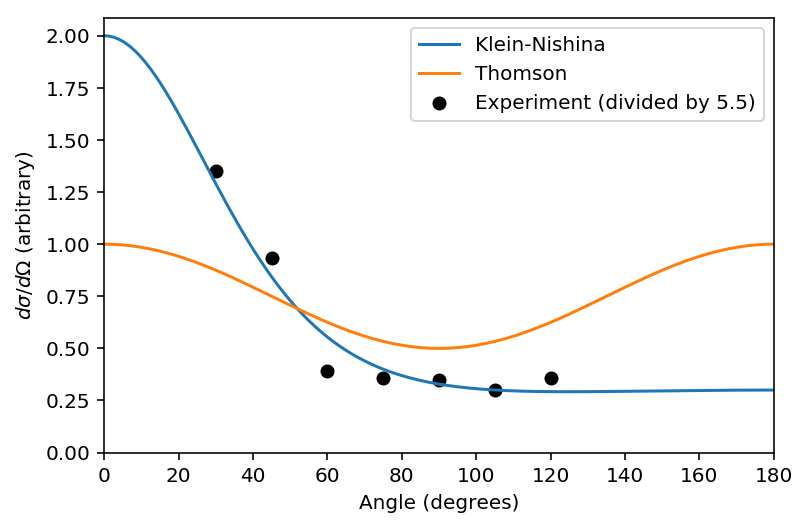

In [6]:
# student data from Fall 2019
theta = array([30,45,60,75,90,105,120])
dsdtexp = array([7.42,5.13,2.14,1.96,1.92,1.64,1.96])

figure()
plot(thetadeg,dsdth,label="Klein-Nishina")
plot(thetadeg,dsdth_Thomson,label='Thomson')
scatter(theta,dsdtexp/5.5,c='k',label="Experiment (divided by 5.5)")
xlim(0,180)
ylim(0)
xlabel('Angle (degrees)')
ylabel(r'$d\sigma/d\Omega\ \rm{ (arbitrary)}$')
legend()

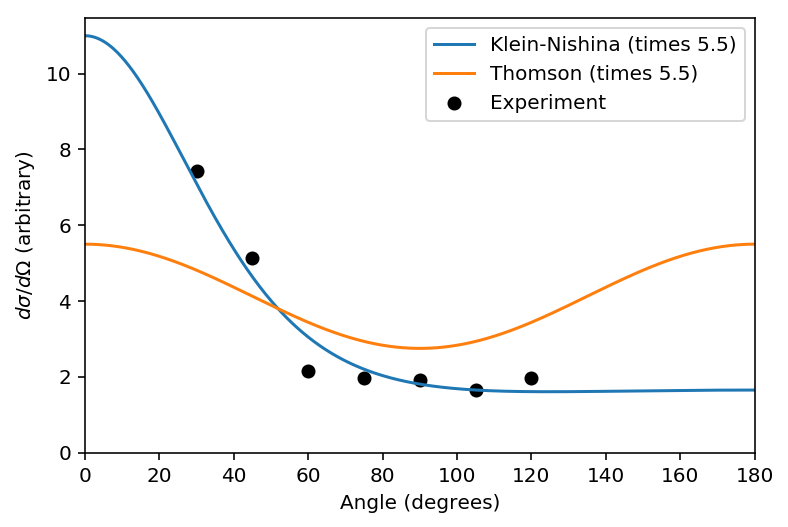

In [4]:
theta = array([30,45,60,75,90,105,120])
dsdtexp = array([7.42,5.13,2.14,1.96,1.92,1.64,1.96])

scale = 5.5
figure()
plot(thetadeg,scale*dsdth,label="Klein-Nishina (times 5.5)")
plot(thetadeg,scale*dsdth_Thomson,label='Thomson (times 5.5)')
scatter(theta,dsdtexp,c='k',label="Experiment")
xlim(0,180)
ylim(0)
xlabel('Angle (degrees)')
ylabel(r'$d\sigma/d\Omega\ \rm{ (arbitrary)}$')
legend()

[0.25239971 0.31153854 0.38656718 0.45643266 0.51963307 0.57065436
 0.59104503]
[1.87280587 1.59819272 0.82725377 0.89460801 0.9976955  0.93587315
 1.15844827]


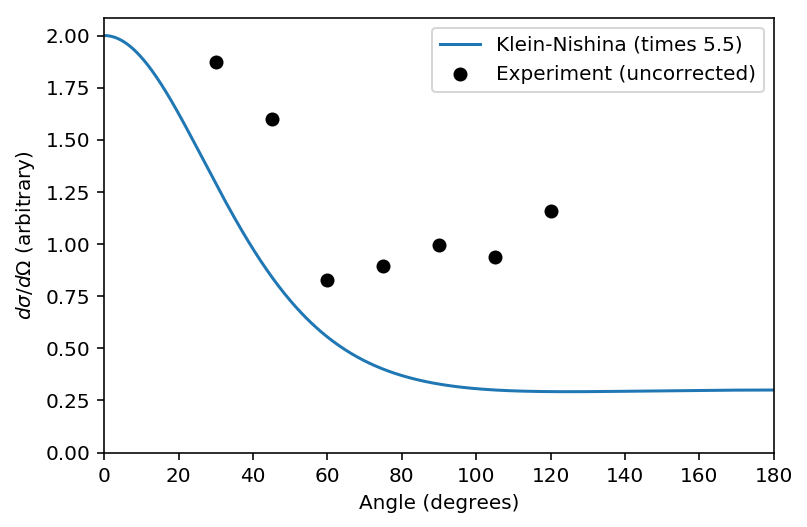

In [11]:
# corrections
n = array([0.8286,0.8172,0.8049,0.7917,0.7790,0.7637,0.7607])
e = array([0.6599,0.7086,0.7574,0.8043,0.8517,0.8795,0.8972])
p = array([0.4616,0.5380,0.6341,0.7168,0.7832,0.8496,0.8660])
print(n*e*p)
Cot = dsdtexp*n*e*p # remove corrections
print(Cot)

scale = 1
figure()
plot(thetadeg,scale*dsdth,label="Klein-Nishina (times 5.5)")
scatter(theta,Cot,c='k',label="Experiment (uncorrected)")
xlim(0,180)
ylim(0)
xlabel('Angle (degrees)')
ylabel(r'$d\sigma/d\Omega\ \rm{ (arbitrary)}$')
legend()

ValueError: x and y must have same first dimension, but have shapes (900,) and (7,)

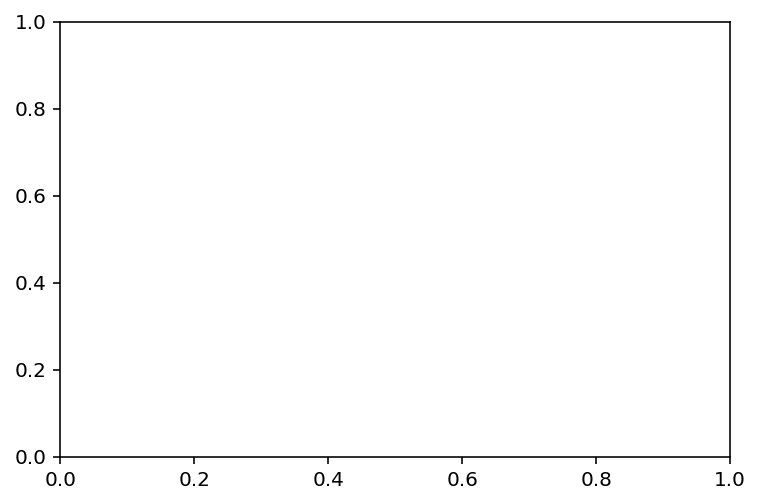

In [12]:
d2 = 0.5*(1+cos(theta)**2)/(1+a*(1-cos(theta)))**2*(1+a**2*(1-cos(theta))**2/(1+cos(theta)**2)/(1+a*(1-cos(theta))))

figure()
plot(thetadeg,d2)
xlim(0,180)
ylim(0)

Student data from Fall 2017

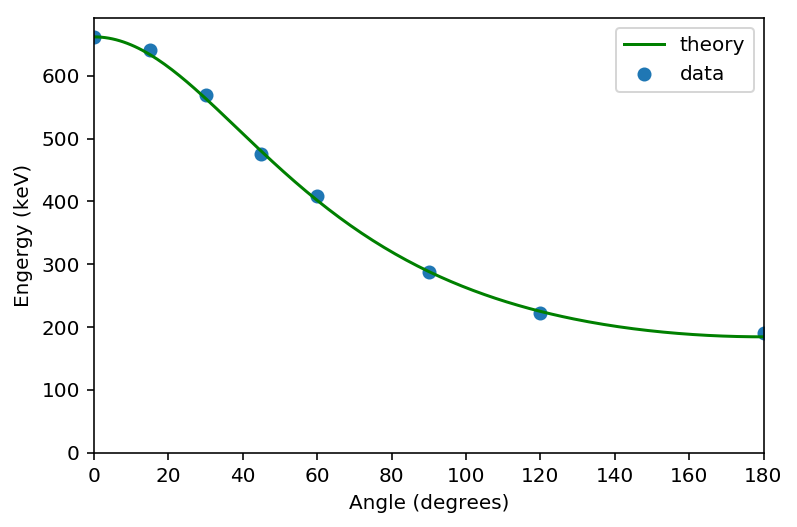

In [13]:
from numpy import *
from pylab import *

mc2 = 511.
E0 = 662. #658.

th_data = array([0,15,30,45,60,90,120,180])
E_data = array([661, 641.5, 570, 475.6, 408.6, 287.6, 222.8, 190.8])

theta = arange(0,181,1)
E = E0/(1.0+(E0/mc2)*(1.0-cos(radians(theta))))
figure()
plot(theta,E,c='g',label='theory')
scatter(th_data,E_data,label='data')
xlabel('Angle (degrees)')
ylabel('Engergy (keV)')
xlim(0,180)
ylim(0)
legend()

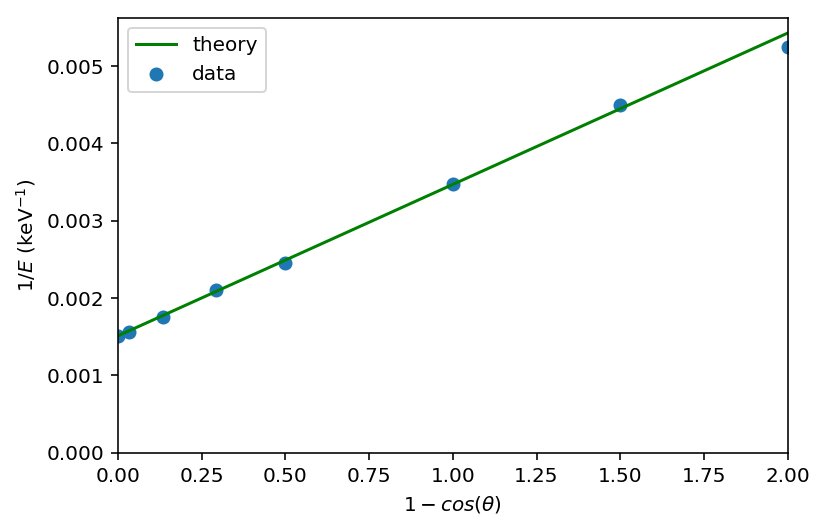

In [14]:
x=(1.0-cos(radians(th_data)))
y=1.0/E_data
plot((1.0-cos(radians(theta))),1/E,c='g',label='theory')
scatter(x,y,label='data')
xlabel(r'$1-cos(\theta)$')
ylabel(r'$1/E\ \rm{(keV^{-1})}$')
xlim(0,2)
ylim(0)
legend()

In [18]:
from fitting import linear_fit
a, b, sa, sb, rchi2, dof = linear_fit(x, y)
print('y = ax + b')
print('a = ', a, ' +/- ', sa)
print('b = ', b, ' +/- ', sb)

print(1/a,1/b)
#print(sa/a,sb/b)

results of linear_fit: no uncertainties provided, so use with caution
   reduced chi squared =  4.19466771906766e-09
   degrees of freedom =  6
y = ax + b
('a = ', 0.0019096876294054433, ' +/- ', 0.5078589331363685)
('b = ', 0.0015192323556281083, ' +/- ', 0.4951590961873137)
(523.645848987008, 658.2271607732855)


In [24]:
def compton(th,A,B):
    return(A/(1+B*(1-cos(radians(th)))))

from fitting import general_fit
p0 = [662., 511./662.]
popt, punc, rchi2, dof = general_fit(compton, th_data, E_data, p0)
print('optimal parameters: ', popt)
print('uncertainties of parameters: ', punc)
print(popt[0]/popt[1])

results of general_fit: no uncertainties provided, so use with caution
   degrees of freedom =  6
   reduced chi squared =  26.797725895030535
('optimal parameters: ', array([665.05953214,   1.29269402]))
('uncertainties of parameters: ', array([3.4857686 , 0.02605173]))
514.4755997014257


In [19]:
def compton2(th,B):
    return(E_data[0]/(1+B*(1-cos(radians(th)))))

from fitting import general_fit
p0 = [511./662.]
popt, punc, rchi2, dof = general_fit(compton2, th_data, E_data, p0)
print('optimal parameters: ', popt)
print('uncertainties of parameters: ', punc)
print(E_data[0]/popt[0])

results of general_fit: no uncertainties provided, so use with caution
   degrees of freedom =  7
   reduced chi squared =  28.17316284822041
('optimal parameters: ', array([1.27270851]))
('uncertainties of parameters: ', array([0.019842]))
519.3648011208836


results of linear_fit:
   reduced chi squared =  153.941214659
   degrees of freedom =  1
y = ax + b
('a = ', 1.1486412151266823, ' +/- ', 0.017598381552826454)
('b = ', -58.555579034512235, ' +/- ', 8.163851344817177)
[666.23702771 505.42725759  33.33571818]
[19.2684301  16.80465669  9.57172187]


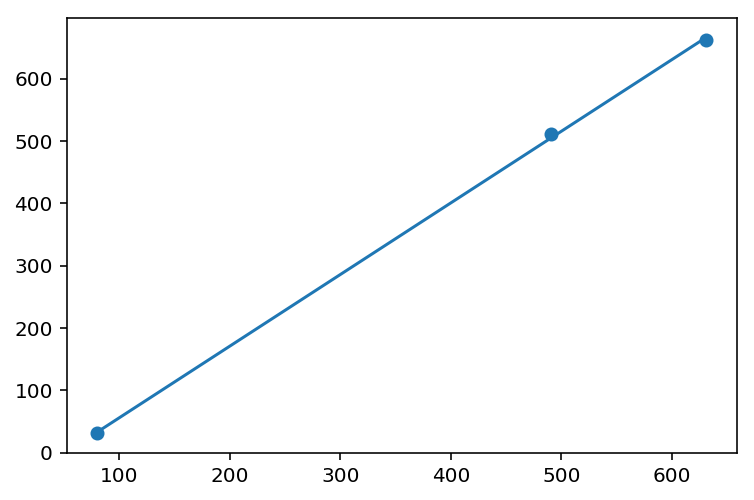

In [27]:
E = array([662,511,32])
sE = array([0.01,0.01,0.01])
Ch = array([631,491,80])
sCh = array([0.5,0.5,0.5])

from fitting import linear_fit
a, b, sa, sb, rchi2, dof = linear_fit(Ch, E, sE, sCh)
print('y = ax + b')
print('a = ', a, ' +/- ', sa)
print('b = ', b, ' +/- ', sb)

print(a*Ch +b)
print(sa*Ch + sb)

figure()
scatter(Ch,E)
plot(Ch,a*Ch+b)